In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 불필요한 경고가 뜨지 않게..
import warnings
warnings.filterwarnings('ignore')

# 데이터 전처리 알고리즘 (비지도 학습)
# 문자열 데이터를 숫자로 변환한다.
from sklearn.preprocessing import LabelEncoder
# 표준편차를 기반으로 표준화 한다.
# 잘못된 학습을 정상화 시키는 목적으로 사용한다.
from sklearn.preprocessing import StandardScaler
# 최소값을 0, 최대값1로 하는 표준화
from sklearn.preprocessing import MinMaxScaler


# 데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split
# 교차 검증
from sklearn.model_selection import cross_val_score

# 평가 함수
# 정확도 평가 함수
from sklearn.metrics import accuracy_score
# mse 평가 함수
from sklearn.metrics import mean_squared_error

# 학습 알고리즘 - 분류
# 최 근접 이웃
# 학습시 : 주어진 데이터를 저장만 한다.
# 예측 : 주변의 데이터를 보고 가장 많은 결과로 결정한다.
from sklearn.neighbors import KNeighborsClassifier
# 선형
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# 트리
# 학습시 : 주어진 데이터를 가지고 질문들을 생성한다.
# 예측시 : 질문을 통해 최종 결과를 예측한다.
from sklearn.tree import DecisionTreeClassifier
# 앙상블 - 다수의 알고리즘이 던지는 결과를 취합하여 최종 결과를 결정한다.
# 트리들을 사용한다.
# 학습시 - 데이터를 랜덤하게 섞어서 80%를 추출한다.
# 이렇게 추출된 데이터를 트리의 개수만큼 생성하여 각 트리들에게 주고
# 학습을 수행한다.
# 예측시 - 각 트리가 던지는 결과를 취합하여 다수결의 원칙으로 최종 결과를
# 결정한다.
from sklearn.ensemble import RandomForestClassifier
# 부스팅
# 앙상블 알고리즘이 잘못 예측한 데이터를 다시 학습하는 방식
# 학습과 예측 원리를 앙상블과 동일하다.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 학습 알고리즘 - 회귀
# 최 근접 이웃
from sklearn.neighbors import KNeighborsRegressor
# 선형
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
# 트리
from sklearn.tree import DecisionTreeRegressor
# 앙상블
from sklearn.ensemble import RandomForestRegressor
# 부스팅
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 딥러닝
import tensorflow as tf

# 딥러닝 모델의 각 층을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형회귀를 수행하는 은닉층
from tensorflow.keras.layers import Dense
# 활성화 함수를 관리하는 것
from tensorflow.keras.layers import Activation

# 조기중단
from tensorflow.keras.callbacks import EarlyStopping

# 성능이 개선되면 모델을 파일로 자동 저장한다
from tensorflow.keras.callbacks import ModelCheckpoint

# 저장된 딥러닝모델 불러오기 .h5파일
from tensorflow.keras.models import load_model


# 원핫 인코딩 하는 함수
from tensorflow.keras.utils import to_categorical

import pickle

### 데이터를 불러온다

In [2]:
df1 = pd.read_csv('data/mushrooms.csv')
df1.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8031,p,k,y,e,f,f,f,c,n,b,...,k,p,p,p,w,o,e,w,v,p
8032,p,x,s,n,f,f,f,c,n,b,...,s,w,w,p,w,o,e,w,v,d
8033,p,k,y,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
8034,e,k,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8035,e,b,f,w,f,n,f,w,b,p,...,s,w,w,p,w,t,p,w,n,g


### 데이터 전처리

In [3]:
# 인코더를 담을 딕셔너리
encoder_dict = {}

# 컬럼 이름 목록을 가져온다
columns = df1.columns
columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
# 컬럼의 이름만큼 반복
for c1 in columns : 
    # Lable Encoder 생성한다
    encoder1 = LabelEncoder()
    # 학습 및 변환
    df1[c1] = encoder1.fit_transform(df1[c1])
    # 인코더를 딕셔너리에 담아준다
    encoder_dict[c1] = encoder1

In [5]:
df1 # object 타입이 전부 다 숫자로 변환됐음

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8031,1,3,3,2,0,2,1,0,1,0,...,1,6,6,0,2,1,0,7,4,4
8032,1,5,2,4,0,2,1,0,1,0,...,2,7,7,0,2,1,0,7,4,0
8033,1,3,3,4,0,2,1,0,1,0,...,2,6,7,0,2,1,0,7,4,2
8034,0,3,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2


In [6]:
encoder_dict # 각 컬럼 이름대로 Label Encoder생성됐음

{'class': LabelEncoder(),
 'cap-shape': LabelEncoder(),
 'cap-surface': LabelEncoder(),
 'cap-color': LabelEncoder(),
 'bruises': LabelEncoder(),
 'odor': LabelEncoder(),
 'gill-attachment': LabelEncoder(),
 'gill-spacing': LabelEncoder(),
 'gill-size': LabelEncoder(),
 'gill-color': LabelEncoder(),
 'stalk-shape': LabelEncoder(),
 'stalk-root': LabelEncoder(),
 'stalk-surface-above-ring': LabelEncoder(),
 'stalk-surface-below-ring': LabelEncoder(),
 'stalk-color-above-ring': LabelEncoder(),
 'stalk-color-below-ring': LabelEncoder(),
 'veil-type': LabelEncoder(),
 'veil-color': LabelEncoder(),
 'ring-number': LabelEncoder(),
 'ring-type': LabelEncoder(),
 'spore-print-color': LabelEncoder(),
 'population': LabelEncoder(),
 'habitat': LabelEncoder()}

In [7]:
# 입력과 결과로 나눠준다.
X = df1.drop('class', axis=1)
y = df1['class']

display(X)
display(y)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8031,3,3,2,0,2,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
8032,5,2,4,0,2,1,0,1,0,1,...,2,7,7,0,2,1,0,7,4,0
8033,3,3,4,0,2,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,2
8034,3,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2


0       1
1       0
2       0
3       1
4       0
       ..
8031    1
8032    1
8033    1
8034    0
8035    0
Name: class, Length: 8036, dtype: int32

In [8]:
# 입력데이터 X의 컬럼 수 파악
n_features = X.shape[1]
n_features # 22개임

22

In [9]:
# 결과 데이터의 종류 수
a1 = y.value_counts()
n_classes = len(a1) # 결과 데이터 2개임 이진분류로 학습
n_classes 

2

In [10]:
# 입력데이터 표준화
# 모든 컬럼의 값의 범위를 비슷한 수준으로 맞춰서
# 학습의 정상화를 보장받을 수 있게 한다.
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
X

array([[ 1.02521414,  0.1416885 , -0.20116403, ..., -0.66413842,
        -0.51759105,  2.026306  ],
       [ 1.02521414,  0.1416885 ,  1.75734595, ..., -0.24250654,
        -1.3162396 , -0.29318334],
       [-2.08839918,  0.1416885 ,  1.36564395, ..., -0.24250654,
        -1.3162396 ,  0.86656133],
       ...,
       [-0.22023119,  0.95266344, -0.20116403, ...,  1.44402098,
         0.2810575 ,  0.286689  ],
       [-0.22023119,  0.1416885 , -0.20116403, ..., -1.50740218,
        -2.11488816,  0.286689  ],
       [-2.08839918, -1.48026136,  1.36564395, ...,  1.44402098,
        -1.3162396 , -0.29318334]])

### 학습

In [11]:
# 랜덤을 고정한다.
np.random.seed(1)
tf.random.set_seed(1)

In [12]:
# 모델을 설계한다
model = Sequential()

# 첫 번째 은닉층은 input_dim 속성을 통해 입력층의 노드를 설정해 준다
# 일단 은닉층은 작게 시작해보고 학습이 안되면 쪼금씩 늘려본다
model.add(Dense(40, input_dim=n_features))
model.add(Activation('relu')) # 활성함수는 렐루 씀

model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('relu'))

# 출력층
# 2진 분류의 경우
# 출력층의 노드 개수는 1개
# 출력층의 활성화 함수는 sigmoid 함수 씀(결과 데이터가 0또는 1만 있음)
# sigmoid함수 그래프 보면 이해됨 0이랑 1로 수렴시키니까
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [13]:
# 모델 컴파일
# loss : 오차를 평가할 함수
# 2진분류 : binary_crossentropy
# optimizer : 경사하강법. adam을 사용함(무조건 아담 사용함)
# metrics : 학습 중 평가를 위한 함수. accuracy 분류니까 정확도 보려고
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
# 학습용과 검증용 데이터로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
# 조기중단
# 검증용 데이터의 손실률을 모니터링 하면서 더이상 개선되지 않으면 학습중단
# patience : 손실률을 몇 번을 더 볼것인가를 설정한다 손실률 개선 안돼도 몇 번 반복 할 지
# 그동안 개선 안되면 중단함.!
callback1 = EarlyStopping(monitor='val_loss', patience = 50) # 50번 내에 개선 안되면 중단

In [16]:
# 자동 저장
# 검증용 데이터의 손실률을 모니터링 하게 하여 개선이 될 경우 저장한다
file_name = '03_model.h5'

# save_best_only : 모니터링하는 손실률의 최하 수치보다 더 개선이 될 때만
# 저장한다.
callback2 = ModelCheckpoint(filepath=file_name, monitor='val_loss',
                           save_best_only=True)

In [17]:
# 학습한다.
# 첫번째, 두번째 : 학습데이터
# 세번째 : 학습 횟수
# 네번째 : 학습을 위해 사용하는 메모리 공간(ram이나 vram)에 저장하는
# 데이터 양.
# validation_data : 검증용으로 사용할 데이터
# callbacks : 조기중단, 자동저장을 설정한다.
history = model.fit(X_train, y_train, epochs=10000, batch_size=500,
                   validation_data=(X_test, y_test),
                   callbacks=[callback1, callback2])

Epoch 1/10000
13/13 [==============================] - 2s 51ms/step - loss: 0.6518 - accuracy: 0.6013 - val_loss: 0.5680 - val_accuracy: 0.7058
Epoch 2/10000
13/13 [==============================] - 0s 15ms/step - loss: 0.5248 - accuracy: 0.7425 - val_loss: 0.4556 - val_accuracy: 0.8218
Epoch 3/10000
13/13 [==============================] - 0s 16ms/step - loss: 0.4242 - accuracy: 0.8442 - val_loss: 0.3639 - val_accuracy: 0.8870
Epoch 4/10000
13/13 [==============================] - 0s 16ms/step - loss: 0.3384 - accuracy: 0.8870 - val_loss: 0.2865 - val_accuracy: 0.9074
Epoch 5/10000
13/13 [==============================] - 0s 17ms/step - loss: 0.2602 - accuracy: 0.9109 - val_loss: 0.2195 - val_accuracy: 0.9323
Epoch 6/10000
13/13 [==============================] - 0s 20ms/step - loss: 0.1955 - accuracy: 0.9348 - val_loss: 0.1723 - val_accuracy: 0.9457
Epoch 7/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1498 - accuracy: 0.9519 - val_loss: 0.1394 - val_accuracy:

13/13 [==============================] - 0s 11ms/step - loss: 7.0970e-04 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 58/10000
13/13 [==============================] - 0s 11ms/step - loss: 6.7939e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 59/10000
13/13 [==============================] - 0s 11ms/step - loss: 6.4851e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 60/10000
13/13 [==============================] - 0s 11ms/step - loss: 6.2049e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 61/10000
13/13 [==============================] - 0s 10ms/step - loss: 5.9477e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 62/10000
13/13 [==============================] - 0s 10ms/step - loss: 5.6904e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 63/10000
13/13 [==============================] - 0s 11ms/step - loss: 5.4390e-04 - accuracy: 1.0000 - val_loss: 0.

13/13 [==============================] - 0s 11ms/step - loss: 1.2884e-04 - accuracy: 1.0000 - val_loss: 4.7902e-04 - val_accuracy: 1.0000
Epoch 112/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.2593e-04 - accuracy: 1.0000 - val_loss: 4.6840e-04 - val_accuracy: 1.0000
Epoch 113/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.2361e-04 - accuracy: 1.0000 - val_loss: 4.5569e-04 - val_accuracy: 1.0000
Epoch 114/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.2111e-04 - accuracy: 1.0000 - val_loss: 4.4980e-04 - val_accuracy: 1.0000
Epoch 115/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.1806e-04 - accuracy: 1.0000 - val_loss: 4.4097e-04 - val_accuracy: 1.0000
Epoch 116/10000
13/13 [==============================] - 0s 10ms/step - loss: 1.1571e-04 - accuracy: 1.0000 - val_loss: 4.1402e-04 - val_accuracy: 1.0000
Epoch 117/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.1295e-04 - a

13/13 [==============================] - 0s 10ms/step - loss: 4.8292e-05 - accuracy: 1.0000 - val_loss: 2.0912e-04 - val_accuracy: 1.0000
Epoch 165/10000
13/13 [==============================] - 0s 11ms/step - loss: 4.7574e-05 - accuracy: 1.0000 - val_loss: 2.0540e-04 - val_accuracy: 1.0000
Epoch 166/10000
13/13 [==============================] - 0s 12ms/step - loss: 4.6908e-05 - accuracy: 1.0000 - val_loss: 2.0357e-04 - val_accuracy: 1.0000
Epoch 167/10000
13/13 [==============================] - 0s 12ms/step - loss: 4.6232e-05 - accuracy: 1.0000 - val_loss: 1.9994e-04 - val_accuracy: 1.0000
Epoch 168/10000
13/13 [==============================] - 0s 11ms/step - loss: 4.5997e-05 - accuracy: 1.0000 - val_loss: 1.9270e-04 - val_accuracy: 1.0000
Epoch 169/10000
13/13 [==============================] - 0s 11ms/step - loss: 4.4845e-05 - accuracy: 1.0000 - val_loss: 1.9101e-04 - val_accuracy: 1.0000
Epoch 170/10000
13/13 [==============================] - 0s 11ms/step - loss: 4.4062e-05 - a

13/13 [==============================] - 0s 12ms/step - loss: 2.2853e-05 - accuracy: 1.0000 - val_loss: 1.1524e-04 - val_accuracy: 1.0000
Epoch 218/10000
13/13 [==============================] - 0s 11ms/step - loss: 2.2537e-05 - accuracy: 1.0000 - val_loss: 1.1421e-04 - val_accuracy: 1.0000
Epoch 219/10000
13/13 [==============================] - 0s 13ms/step - loss: 2.2265e-05 - accuracy: 1.0000 - val_loss: 1.1250e-04 - val_accuracy: 1.0000
Epoch 220/10000
13/13 [==============================] - 0s 12ms/step - loss: 2.2026e-05 - accuracy: 1.0000 - val_loss: 1.1151e-04 - val_accuracy: 1.0000
Epoch 221/10000
13/13 [==============================] - 0s 8ms/step - loss: 2.1936e-05 - accuracy: 1.0000 - val_loss: 1.1430e-04 - val_accuracy: 1.0000
Epoch 222/10000
13/13 [==============================] - 0s 7ms/step - loss: 2.2028e-05 - accuracy: 1.0000 - val_loss: 1.1188e-04 - val_accuracy: 1.0000
Epoch 223/10000
13/13 [==============================] - 0s 12ms/step - loss: 2.1248e-05 - acc

13/13 [==============================] - 0s 11ms/step - loss: 1.2156e-05 - accuracy: 1.0000 - val_loss: 6.6372e-05 - val_accuracy: 1.0000
Epoch 271/10000
13/13 [==============================] - 0s 10ms/step - loss: 1.2014e-05 - accuracy: 1.0000 - val_loss: 6.5562e-05 - val_accuracy: 1.0000
Epoch 272/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.1885e-05 - accuracy: 1.0000 - val_loss: 6.4938e-05 - val_accuracy: 1.0000
Epoch 273/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.1762e-05 - accuracy: 1.0000 - val_loss: 6.4319e-05 - val_accuracy: 1.0000
Epoch 274/10000
13/13 [==============================] - 0s 10ms/step - loss: 1.1637e-05 - accuracy: 1.0000 - val_loss: 6.4026e-05 - val_accuracy: 1.0000
Epoch 275/10000
13/13 [==============================] - 0s 10ms/step - loss: 1.1515e-05 - accuracy: 1.0000 - val_loss: 6.3555e-05 - val_accuracy: 1.0000
Epoch 276/10000
13/13 [==============================] - 0s 10ms/step - loss: 1.1421e-05 - a

13/13 [==============================] - 0s 14ms/step - loss: 7.0315e-06 - accuracy: 1.0000 - val_loss: 3.7289e-05 - val_accuracy: 1.0000
Epoch 324/10000
13/13 [==============================] - 0s 13ms/step - loss: 6.9822e-06 - accuracy: 1.0000 - val_loss: 3.7212e-05 - val_accuracy: 1.0000
Epoch 325/10000
13/13 [==============================] - 0s 8ms/step - loss: 6.9026e-06 - accuracy: 1.0000 - val_loss: 3.7236e-05 - val_accuracy: 1.0000
Epoch 326/10000
13/13 [==============================] - 0s 12ms/step - loss: 6.8477e-06 - accuracy: 1.0000 - val_loss: 3.7143e-05 - val_accuracy: 1.0000
Epoch 327/10000
13/13 [==============================] - 0s 14ms/step - loss: 6.7743e-06 - accuracy: 1.0000 - val_loss: 3.7083e-05 - val_accuracy: 1.0000
Epoch 328/10000
13/13 [==============================] - 0s 12ms/step - loss: 6.7074e-06 - accuracy: 1.0000 - val_loss: 3.6940e-05 - val_accuracy: 1.0000
Epoch 329/10000
13/13 [==============================] - 0s 13ms/step - loss: 6.6437e-06 - ac

13/13 [==============================] - 0s 13ms/step - loss: 4.2396e-06 - accuracy: 1.0000 - val_loss: 2.7155e-05 - val_accuracy: 1.0000
Epoch 377/10000
13/13 [==============================] - 0s 12ms/step - loss: 4.2147e-06 - accuracy: 1.0000 - val_loss: 2.6803e-05 - val_accuracy: 1.0000
Epoch 378/10000
13/13 [==============================] - 0s 11ms/step - loss: 4.1563e-06 - accuracy: 1.0000 - val_loss: 2.6623e-05 - val_accuracy: 1.0000
Epoch 379/10000
13/13 [==============================] - 0s 11ms/step - loss: 4.1278e-06 - accuracy: 1.0000 - val_loss: 2.6487e-05 - val_accuracy: 1.0000
Epoch 380/10000
13/13 [==============================] - 0s 11ms/step - loss: 4.0857e-06 - accuracy: 1.0000 - val_loss: 2.6169e-05 - val_accuracy: 1.0000
Epoch 381/10000
13/13 [==============================] - 0s 12ms/step - loss: 4.0419e-06 - accuracy: 1.0000 - val_loss: 2.6001e-05 - val_accuracy: 1.0000
Epoch 382/10000
13/13 [==============================] - 0s 11ms/step - loss: 4.0057e-06 - a

13/13 [==============================] - 0s 10ms/step - loss: 2.6264e-06 - accuracy: 1.0000 - val_loss: 1.8370e-05 - val_accuracy: 1.0000
Epoch 430/10000
13/13 [==============================] - 0s 10ms/step - loss: 2.5976e-06 - accuracy: 1.0000 - val_loss: 1.8063e-05 - val_accuracy: 1.0000
Epoch 431/10000
13/13 [==============================] - 0s 10ms/step - loss: 2.5846e-06 - accuracy: 1.0000 - val_loss: 1.7545e-05 - val_accuracy: 1.0000
Epoch 432/10000
13/13 [==============================] - 0s 11ms/step - loss: 2.5593e-06 - accuracy: 1.0000 - val_loss: 1.7500e-05 - val_accuracy: 1.0000
Epoch 433/10000
13/13 [==============================] - 0s 10ms/step - loss: 2.5313e-06 - accuracy: 1.0000 - val_loss: 1.7415e-05 - val_accuracy: 1.0000
Epoch 434/10000
13/13 [==============================] - 0s 10ms/step - loss: 2.5093e-06 - accuracy: 1.0000 - val_loss: 1.7310e-05 - val_accuracy: 1.0000
Epoch 435/10000
13/13 [==============================] - 0s 10ms/step - loss: 2.4917e-06 - a

13/13 [==============================] - 0s 10ms/step - loss: 1.6546e-06 - accuracy: 1.0000 - val_loss: 1.1916e-05 - val_accuracy: 1.0000
Epoch 483/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.6370e-06 - accuracy: 1.0000 - val_loss: 1.1841e-05 - val_accuracy: 1.0000
Epoch 484/10000
13/13 [==============================] - 0s 14ms/step - loss: 1.6249e-06 - accuracy: 1.0000 - val_loss: 1.1742e-05 - val_accuracy: 1.0000
Epoch 485/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.6108e-06 - accuracy: 1.0000 - val_loss: 1.1698e-05 - val_accuracy: 1.0000
Epoch 486/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.6100e-06 - accuracy: 1.0000 - val_loss: 1.1532e-05 - val_accuracy: 1.0000
Epoch 487/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.5924e-06 - accuracy: 1.0000 - val_loss: 1.1381e-05 - val_accuracy: 1.0000
Epoch 488/10000
13/13 [==============================] - 0s 13ms/step - loss: 1.5730e-06 - a

13/13 [==============================] - 0s 13ms/step - loss: 1.0639e-06 - accuracy: 1.0000 - val_loss: 8.2536e-06 - val_accuracy: 1.0000
Epoch 536/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.0557e-06 - accuracy: 1.0000 - val_loss: 8.1761e-06 - val_accuracy: 1.0000
Epoch 537/10000
13/13 [==============================] - 0s 8ms/step - loss: 1.0615e-06 - accuracy: 1.0000 - val_loss: 8.2812e-06 - val_accuracy: 1.0000
Epoch 538/10000
13/13 [==============================] - 0s 16ms/step - loss: 1.0764e-06 - accuracy: 1.0000 - val_loss: 8.1698e-06 - val_accuracy: 1.0000
Epoch 539/10000
13/13 [==============================] - 0s 14ms/step - loss: 1.0563e-06 - accuracy: 1.0000 - val_loss: 8.0550e-06 - val_accuracy: 1.0000
Epoch 540/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.0288e-06 - accuracy: 1.0000 - val_loss: 7.9739e-06 - val_accuracy: 1.0000
Epoch 541/10000
13/13 [==============================] - 0s 12ms/step - loss: 1.0128e-06 - ac

13/13 [==============================] - 0s 11ms/step - loss: 6.9637e-07 - accuracy: 1.0000 - val_loss: 5.7542e-06 - val_accuracy: 1.0000
Epoch 589/10000
13/13 [==============================] - 0s 12ms/step - loss: 6.9138e-07 - accuracy: 1.0000 - val_loss: 5.7259e-06 - val_accuracy: 1.0000
Epoch 590/10000
13/13 [==============================] - 0s 12ms/step - loss: 6.8577e-07 - accuracy: 1.0000 - val_loss: 5.6828e-06 - val_accuracy: 1.0000
Epoch 591/10000
13/13 [==============================] - 0s 12ms/step - loss: 6.8050e-07 - accuracy: 1.0000 - val_loss: 5.6468e-06 - val_accuracy: 1.0000
Epoch 592/10000
13/13 [==============================] - 0s 12ms/step - loss: 6.7551e-07 - accuracy: 1.0000 - val_loss: 5.5778e-06 - val_accuracy: 1.0000
Epoch 593/10000
13/13 [==============================] - 0s 13ms/step - loss: 6.7161e-07 - accuracy: 1.0000 - val_loss: 5.3549e-06 - val_accuracy: 1.0000
Epoch 594/10000
13/13 [==============================] - 0s 12ms/step - loss: 6.6513e-07 - a

13/13 [==============================] - 0s 10ms/step - loss: 4.6314e-07 - accuracy: 1.0000 - val_loss: 3.8680e-06 - val_accuracy: 1.0000
Epoch 642/10000
13/13 [==============================] - 0s 8ms/step - loss: 4.6024e-07 - accuracy: 1.0000 - val_loss: 3.8691e-06 - val_accuracy: 1.0000
Epoch 643/10000
13/13 [==============================] - 0s 8ms/step - loss: 4.5380e-07 - accuracy: 1.0000 - val_loss: 3.9100e-06 - val_accuracy: 1.0000
Epoch 644/10000
13/13 [==============================] - 0s 7ms/step - loss: 4.4866e-07 - accuracy: 1.0000 - val_loss: 3.8865e-06 - val_accuracy: 1.0000
Epoch 645/10000
13/13 [==============================] - 0s 12ms/step - loss: 4.4500e-07 - accuracy: 1.0000 - val_loss: 3.8592e-06 - val_accuracy: 1.0000
Epoch 646/10000
13/13 [==============================] - 0s 12ms/step - loss: 4.4147e-07 - accuracy: 1.0000 - val_loss: 3.8264e-06 - val_accuracy: 1.0000
Epoch 647/10000
13/13 [==============================] - 0s 11ms/step - loss: 4.3754e-07 - accu

13/13 [==============================] - 0s 7ms/step - loss: 3.0448e-07 - accuracy: 1.0000 - val_loss: 2.5427e-06 - val_accuracy: 1.0000
Epoch 695/10000
13/13 [==============================] - 0s 10ms/step - loss: 3.0186e-07 - accuracy: 1.0000 - val_loss: 2.5418e-06 - val_accuracy: 1.0000
Epoch 696/10000
13/13 [==============================] - 0s 10ms/step - loss: 2.9965e-07 - accuracy: 1.0000 - val_loss: 2.5274e-06 - val_accuracy: 1.0000
Epoch 697/10000
13/13 [==============================] - 0s 10ms/step - loss: 2.9744e-07 - accuracy: 1.0000 - val_loss: 2.5189e-06 - val_accuracy: 1.0000
Epoch 698/10000
13/13 [==============================] - 0s 11ms/step - loss: 2.9537e-07 - accuracy: 1.0000 - val_loss: 2.5085e-06 - val_accuracy: 1.0000
Epoch 699/10000
13/13 [==============================] - 0s 10ms/step - loss: 2.9305e-07 - accuracy: 1.0000 - val_loss: 2.5018e-06 - val_accuracy: 1.0000
Epoch 700/10000
13/13 [==============================] - 0s 10ms/step - loss: 2.9062e-07 - ac

13/13 [==============================] - 0s 12ms/step - loss: 2.0515e-07 - accuracy: 1.0000 - val_loss: 1.8918e-06 - val_accuracy: 1.0000
Epoch 748/10000
13/13 [==============================] - 0s 11ms/step - loss: 2.0380e-07 - accuracy: 1.0000 - val_loss: 1.8837e-06 - val_accuracy: 1.0000
Epoch 749/10000
13/13 [==============================] - 0s 11ms/step - loss: 2.0219e-07 - accuracy: 1.0000 - val_loss: 1.8782e-06 - val_accuracy: 1.0000
Epoch 750/10000
13/13 [==============================] - 0s 11ms/step - loss: 2.0077e-07 - accuracy: 1.0000 - val_loss: 1.8731e-06 - val_accuracy: 1.0000
Epoch 751/10000
13/13 [==============================] - 0s 13ms/step - loss: 1.9939e-07 - accuracy: 1.0000 - val_loss: 1.8649e-06 - val_accuracy: 1.0000
Epoch 752/10000
13/13 [==============================] - 0s 12ms/step - loss: 1.9779e-07 - accuracy: 1.0000 - val_loss: 1.8484e-06 - val_accuracy: 1.0000
Epoch 753/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.9639e-07 - a

13/13 [==============================] - 0s 11ms/step - loss: 1.3950e-07 - accuracy: 1.0000 - val_loss: 1.3804e-06 - val_accuracy: 1.0000
Epoch 801/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.3823e-07 - accuracy: 1.0000 - val_loss: 1.3731e-06 - val_accuracy: 1.0000
Epoch 802/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.3718e-07 - accuracy: 1.0000 - val_loss: 1.3662e-06 - val_accuracy: 1.0000
Epoch 803/10000
13/13 [==============================] - 0s 10ms/step - loss: 1.3613e-07 - accuracy: 1.0000 - val_loss: 1.3608e-06 - val_accuracy: 1.0000
Epoch 804/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.3516e-07 - accuracy: 1.0000 - val_loss: 1.3581e-06 - val_accuracy: 1.0000
Epoch 805/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.3421e-07 - accuracy: 1.0000 - val_loss: 1.3491e-06 - val_accuracy: 1.0000
Epoch 806/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.3323e-07 - a

13/13 [==============================] - 0s 13ms/step - loss: 9.4494e-08 - accuracy: 1.0000 - val_loss: 9.5775e-07 - val_accuracy: 1.0000
Epoch 854/10000
13/13 [==============================] - 0s 13ms/step - loss: 9.3736e-08 - accuracy: 1.0000 - val_loss: 9.5071e-07 - val_accuracy: 1.0000
Epoch 855/10000
13/13 [==============================] - 0s 8ms/step - loss: 9.3225e-08 - accuracy: 1.0000 - val_loss: 9.5152e-07 - val_accuracy: 1.0000
Epoch 856/10000
13/13 [==============================] - 0s 14ms/step - loss: 9.2547e-08 - accuracy: 1.0000 - val_loss: 9.4872e-07 - val_accuracy: 1.0000
Epoch 857/10000
13/13 [==============================] - 0s 13ms/step - loss: 9.1723e-08 - accuracy: 1.0000 - val_loss: 9.4148e-07 - val_accuracy: 1.0000
Epoch 858/10000
13/13 [==============================] - 0s 14ms/step - loss: 9.1159e-08 - accuracy: 1.0000 - val_loss: 9.3244e-07 - val_accuracy: 1.0000
Epoch 859/10000
13/13 [==============================] - 0s 12ms/step - loss: 9.0492e-08 - ac

13/13 [==============================] - 0s 12ms/step - loss: 6.4112e-08 - accuracy: 1.0000 - val_loss: 6.8537e-07 - val_accuracy: 1.0000
Epoch 907/10000
13/13 [==============================] - 0s 11ms/step - loss: 6.3580e-08 - accuracy: 1.0000 - val_loss: 6.7893e-07 - val_accuracy: 1.0000
Epoch 908/10000
13/13 [==============================] - 0s 10ms/step - loss: 6.3219e-08 - accuracy: 1.0000 - val_loss: 6.7435e-07 - val_accuracy: 1.0000
Epoch 909/10000
13/13 [==============================] - 0s 9ms/step - loss: 6.2875e-08 - accuracy: 1.0000 - val_loss: 6.6742e-07 - val_accuracy: 1.0000
Epoch 910/10000
13/13 [==============================] - 0s 11ms/step - loss: 6.2346e-08 - accuracy: 1.0000 - val_loss: 6.6334e-07 - val_accuracy: 1.0000
Epoch 911/10000
13/13 [==============================] - 0s 9ms/step - loss: 6.1844e-08 - accuracy: 1.0000 - val_loss: 6.5918e-07 - val_accuracy: 1.0000
Epoch 912/10000
13/13 [==============================] - 0s 9ms/step - loss: 6.1400e-08 - accu

13/13 [==============================] - 0s 11ms/step - loss: 4.3723e-08 - accuracy: 1.0000 - val_loss: 4.6753e-07 - val_accuracy: 1.0000
Epoch 960/10000
13/13 [==============================] - 0s 11ms/step - loss: 4.3442e-08 - accuracy: 1.0000 - val_loss: 4.6446e-07 - val_accuracy: 1.0000
Epoch 961/10000
13/13 [==============================] - 0s 10ms/step - loss: 4.3117e-08 - accuracy: 1.0000 - val_loss: 4.6044e-07 - val_accuracy: 1.0000
Epoch 962/10000
13/13 [==============================] - 0s 10ms/step - loss: 4.2805e-08 - accuracy: 1.0000 - val_loss: 4.5777e-07 - val_accuracy: 1.0000
Epoch 963/10000
13/13 [==============================] - 0s 10ms/step - loss: 4.2523e-08 - accuracy: 1.0000 - val_loss: 4.5478e-07 - val_accuracy: 1.0000
Epoch 964/10000
13/13 [==============================] - 0s 10ms/step - loss: 4.2212e-08 - accuracy: 1.0000 - val_loss: 4.5204e-07 - val_accuracy: 1.0000
Epoch 965/10000
13/13 [==============================] - 0s 9ms/step - loss: 4.2009e-08 - ac

13/13 [==============================] - 0s 11ms/step - loss: 3.0204e-08 - accuracy: 1.0000 - val_loss: 3.3407e-07 - val_accuracy: 1.0000
Epoch 1013/10000
13/13 [==============================] - 0s 10ms/step - loss: 2.9957e-08 - accuracy: 1.0000 - val_loss: 3.3221e-07 - val_accuracy: 1.0000
Epoch 1014/10000
13/13 [==============================] - 0s 11ms/step - loss: 2.9774e-08 - accuracy: 1.0000 - val_loss: 3.2946e-07 - val_accuracy: 1.0000
Epoch 1015/10000
13/13 [==============================] - 0s 9ms/step - loss: 2.9558e-08 - accuracy: 1.0000 - val_loss: 3.2634e-07 - val_accuracy: 1.0000
Epoch 1016/10000
13/13 [==============================] - 0s 10ms/step - loss: 2.9431e-08 - accuracy: 1.0000 - val_loss: 3.2445e-07 - val_accuracy: 1.0000
Epoch 1017/10000
13/13 [==============================] - 0s 11ms/step - loss: 2.9206e-08 - accuracy: 1.0000 - val_loss: 3.2289e-07 - val_accuracy: 1.0000
Epoch 1018/10000
13/13 [==============================] - 0s 10ms/step - loss: 2.8998e-0

13/13 [==============================] - 0s 9ms/step - loss: 2.1013e-08 - accuracy: 1.0000 - val_loss: 2.1917e-07 - val_accuracy: 1.0000
Epoch 1066/10000
13/13 [==============================] - 0s 10ms/step - loss: 2.0880e-08 - accuracy: 1.0000 - val_loss: 2.0624e-07 - val_accuracy: 1.0000
Epoch 1067/10000
13/13 [==============================] - 0s 12ms/step - loss: 2.0748e-08 - accuracy: 1.0000 - val_loss: 2.0287e-07 - val_accuracy: 1.0000
Epoch 1068/10000
13/13 [==============================] - 0s 11ms/step - loss: 2.0610e-08 - accuracy: 1.0000 - val_loss: 2.0195e-07 - val_accuracy: 1.0000
Epoch 1069/10000
13/13 [==============================] - 0s 10ms/step - loss: 2.0469e-08 - accuracy: 1.0000 - val_loss: 2.0067e-07 - val_accuracy: 1.0000
Epoch 1070/10000
13/13 [==============================] - 0s 9ms/step - loss: 2.0335e-08 - accuracy: 1.0000 - val_loss: 2.0065e-07 - val_accuracy: 1.0000
Epoch 1071/10000
13/13 [==============================] - 0s 9ms/step - loss: 2.0198e-08 

13/13 [==============================] - 0s 10ms/step - loss: 1.4774e-08 - accuracy: 1.0000 - val_loss: 1.6098e-07 - val_accuracy: 1.0000
Epoch 1119/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.4663e-08 - accuracy: 1.0000 - val_loss: 1.6031e-07 - val_accuracy: 1.0000
Epoch 1120/10000
13/13 [==============================] - 0s 10ms/step - loss: 1.4585e-08 - accuracy: 1.0000 - val_loss: 1.5934e-07 - val_accuracy: 1.0000
Epoch 1121/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.4473e-08 - accuracy: 1.0000 - val_loss: 1.5868e-07 - val_accuracy: 1.0000
Epoch 1122/10000
13/13 [==============================] - 0s 10ms/step - loss: 1.4385e-08 - accuracy: 1.0000 - val_loss: 1.5784e-07 - val_accuracy: 1.0000
Epoch 1123/10000
13/13 [==============================] - 0s 16ms/step - loss: 1.4325e-08 - accuracy: 1.0000 - val_loss: 1.5695e-07 - val_accuracy: 1.0000
Epoch 1124/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.4232e-

13/13 [==============================] - 0s 9ms/step - loss: 1.0454e-08 - accuracy: 1.0000 - val_loss: 1.1503e-07 - val_accuracy: 1.0000
Epoch 1172/10000
13/13 [==============================] - 0s 7ms/step - loss: 1.0343e-08 - accuracy: 1.0000 - val_loss: 1.1559e-07 - val_accuracy: 1.0000
Epoch 1173/10000
13/13 [==============================] - 0s 7ms/step - loss: 1.0238e-08 - accuracy: 1.0000 - val_loss: 1.1582e-07 - val_accuracy: 1.0000
Epoch 1174/10000
13/13 [==============================] - 0s 10ms/step - loss: 1.0183e-08 - accuracy: 1.0000 - val_loss: 1.1490e-07 - val_accuracy: 1.0000
Epoch 1175/10000
13/13 [==============================] - 0s 12ms/step - loss: 1.0115e-08 - accuracy: 1.0000 - val_loss: 1.1421e-07 - val_accuracy: 1.0000
Epoch 1176/10000
13/13 [==============================] - 0s 9ms/step - loss: 1.0052e-08 - accuracy: 1.0000 - val_loss: 1.1328e-07 - val_accuracy: 1.0000
Epoch 1177/10000
13/13 [==============================] - 0s 10ms/step - loss: 9.9959e-09 -

13/13 [==============================] - 0s 8ms/step - loss: 7.4499e-09 - accuracy: 1.0000 - val_loss: 8.3386e-08 - val_accuracy: 1.0000
Epoch 1225/10000
13/13 [==============================] - 0s 9ms/step - loss: 7.4083e-09 - accuracy: 1.0000 - val_loss: 8.2959e-08 - val_accuracy: 1.0000
Epoch 1226/10000
13/13 [==============================] - 0s 10ms/step - loss: 7.3713e-09 - accuracy: 1.0000 - val_loss: 8.2154e-08 - val_accuracy: 1.0000
Epoch 1227/10000
13/13 [==============================] - 0s 11ms/step - loss: 7.3183e-09 - accuracy: 1.0000 - val_loss: 8.1721e-08 - val_accuracy: 1.0000
Epoch 1228/10000
13/13 [==============================] - 0s 9ms/step - loss: 7.2838e-09 - accuracy: 1.0000 - val_loss: 8.1291e-08 - val_accuracy: 1.0000
Epoch 1229/10000
13/13 [==============================] - 0s 9ms/step - loss: 7.2398e-09 - accuracy: 1.0000 - val_loss: 8.0929e-08 - val_accuracy: 1.0000
Epoch 1230/10000
13/13 [==============================] - 0s 8ms/step - loss: 7.1930e-09 - 

13/13 [==============================] - 0s 9ms/step - loss: 5.4066e-09 - accuracy: 1.0000 - val_loss: 5.9229e-08 - val_accuracy: 1.0000
Epoch 1278/10000
13/13 [==============================] - 0s 11ms/step - loss: 5.3745e-09 - accuracy: 1.0000 - val_loss: 5.8885e-08 - val_accuracy: 1.0000
Epoch 1279/10000
13/13 [==============================] - 0s 10ms/step - loss: 5.3489e-09 - accuracy: 1.0000 - val_loss: 5.8593e-08 - val_accuracy: 1.0000
Epoch 1280/10000
13/13 [==============================] - 0s 8ms/step - loss: 5.3161e-09 - accuracy: 1.0000 - val_loss: 5.8170e-08 - val_accuracy: 1.0000
Epoch 1281/10000
13/13 [==============================] - 0s 8ms/step - loss: 5.2865e-09 - accuracy: 1.0000 - val_loss: 5.7898e-08 - val_accuracy: 1.0000
Epoch 1282/10000
13/13 [==============================] - 0s 8ms/step - loss: 5.2680e-09 - accuracy: 1.0000 - val_loss: 5.7615e-08 - val_accuracy: 1.0000
Epoch 1283/10000
13/13 [==============================] - 0s 9ms/step - loss: 5.2294e-09 - 

13/13 [==============================] - 0s 10ms/step - loss: 3.9956e-09 - accuracy: 1.0000 - val_loss: 4.3242e-08 - val_accuracy: 1.0000
Epoch 1331/10000
13/13 [==============================] - 0s 9ms/step - loss: 3.9812e-09 - accuracy: 1.0000 - val_loss: 4.2985e-08 - val_accuracy: 1.0000
Epoch 1332/10000
13/13 [==============================] - 0s 8ms/step - loss: 3.9484e-09 - accuracy: 1.0000 - val_loss: 4.2959e-08 - val_accuracy: 1.0000
Epoch 1333/10000
13/13 [==============================] - 0s 8ms/step - loss: 3.9281e-09 - accuracy: 1.0000 - val_loss: 4.2822e-08 - val_accuracy: 1.0000
Epoch 1334/10000
13/13 [==============================] - 0s 9ms/step - loss: 3.8926e-09 - accuracy: 1.0000 - val_loss: 4.2626e-08 - val_accuracy: 1.0000
Epoch 1335/10000
13/13 [==============================] - 0s 8ms/step - loss: 3.8730e-09 - accuracy: 1.0000 - val_loss: 4.2559e-08 - val_accuracy: 1.0000
Epoch 1336/10000
13/13 [==============================] - 0s 6ms/step - loss: 3.8639e-09 - a

13/13 [==============================] - 0s 9ms/step - loss: 2.9852e-09 - accuracy: 1.0000 - val_loss: 3.1900e-08 - val_accuracy: 1.0000
Epoch 1384/10000
13/13 [==============================] - 0s 9ms/step - loss: 2.9681e-09 - accuracy: 1.0000 - val_loss: 3.1684e-08 - val_accuracy: 1.0000
Epoch 1385/10000
13/13 [==============================] - 0s 9ms/step - loss: 2.9536e-09 - accuracy: 1.0000 - val_loss: 3.1482e-08 - val_accuracy: 1.0000
Epoch 1386/10000
13/13 [==============================] - 0s 10ms/step - loss: 2.9441e-09 - accuracy: 1.0000 - val_loss: 3.1262e-08 - val_accuracy: 1.0000
Epoch 1387/10000
13/13 [==============================] - 0s 9ms/step - loss: 2.9307e-09 - accuracy: 1.0000 - val_loss: 3.1060e-08 - val_accuracy: 1.0000
Epoch 1388/10000
13/13 [==============================] - 0s 8ms/step - loss: 2.9189e-09 - accuracy: 1.0000 - val_loss: 3.0865e-08 - val_accuracy: 1.0000
Epoch 1389/10000
13/13 [==============================] - 0s 8ms/step - loss: 2.9092e-09 - a

13/13 [==============================] - 0s 9ms/step - loss: 2.3495e-09 - accuracy: 1.0000 - val_loss: 2.3271e-08 - val_accuracy: 1.0000
Epoch 1437/10000
13/13 [==============================] - 0s 8ms/step - loss: 2.3265e-09 - accuracy: 1.0000 - val_loss: 2.3079e-08 - val_accuracy: 1.0000
Epoch 1438/10000
13/13 [==============================] - 0s 8ms/step - loss: 2.3166e-09 - accuracy: 1.0000 - val_loss: 2.2935e-08 - val_accuracy: 1.0000
Epoch 1439/10000
13/13 [==============================] - 0s 8ms/step - loss: 2.3113e-09 - accuracy: 1.0000 - val_loss: 2.2809e-08 - val_accuracy: 1.0000
Epoch 1440/10000
13/13 [==============================] - 0s 8ms/step - loss: 2.3045e-09 - accuracy: 1.0000 - val_loss: 2.2651e-08 - val_accuracy: 1.0000
Epoch 1441/10000
13/13 [==============================] - 0s 8ms/step - loss: 2.3027e-09 - accuracy: 1.0000 - val_loss: 2.2547e-08 - val_accuracy: 1.0000
Epoch 1442/10000
13/13 [==============================] - 0s 6ms/step - loss: 2.2902e-09 - ac

13/13 [==============================] - 0s 8ms/step - loss: 1.8906e-09 - accuracy: 1.0000 - val_loss: 1.6533e-08 - val_accuracy: 1.0000
Epoch 1490/10000
13/13 [==============================] - 0s 8ms/step - loss: 1.8824e-09 - accuracy: 1.0000 - val_loss: 1.6454e-08 - val_accuracy: 1.0000
Epoch 1491/10000
13/13 [==============================] - 0s 8ms/step - loss: 1.8758e-09 - accuracy: 1.0000 - val_loss: 1.6368e-08 - val_accuracy: 1.0000
Epoch 1492/10000
13/13 [==============================] - 0s 9ms/step - loss: 1.8695e-09 - accuracy: 1.0000 - val_loss: 1.6293e-08 - val_accuracy: 1.0000
Epoch 1493/10000
13/13 [==============================] - 0s 10ms/step - loss: 1.8642e-09 - accuracy: 1.0000 - val_loss: 1.6240e-08 - val_accuracy: 1.0000
Epoch 1494/10000
13/13 [==============================] - 0s 10ms/step - loss: 1.8565e-09 - accuracy: 1.0000 - val_loss: 1.6151e-08 - val_accuracy: 1.0000
Epoch 1495/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.8500e-09 -

13/13 [==============================] - 0s 8ms/step - loss: 1.5370e-09 - accuracy: 1.0000 - val_loss: 1.2609e-08 - val_accuracy: 1.0000
Epoch 1543/10000
13/13 [==============================] - 0s 8ms/step - loss: 1.5403e-09 - accuracy: 1.0000 - val_loss: 1.2557e-08 - val_accuracy: 1.0000
Epoch 1544/10000
13/13 [==============================] - 0s 8ms/step - loss: 1.5393e-09 - accuracy: 1.0000 - val_loss: 1.2498e-08 - val_accuracy: 1.0000
Epoch 1545/10000
13/13 [==============================] - 0s 10ms/step - loss: 1.5325e-09 - accuracy: 1.0000 - val_loss: 1.2414e-08 - val_accuracy: 1.0000
Epoch 1546/10000
13/13 [==============================] - 0s 8ms/step - loss: 1.5294e-09 - accuracy: 1.0000 - val_loss: 1.2351e-08 - val_accuracy: 1.0000
Epoch 1547/10000
13/13 [==============================] - 0s 8ms/step - loss: 1.5227e-09 - accuracy: 1.0000 - val_loss: 1.2304e-08 - val_accuracy: 1.0000
Epoch 1548/10000
13/13 [==============================] - 0s 8ms/step - loss: 1.5157e-09 - a

13/13 [==============================] - 0s 8ms/step - loss: 1.3196e-09 - accuracy: 1.0000 - val_loss: 9.9478e-09 - val_accuracy: 1.0000
Epoch 1596/10000
13/13 [==============================] - 0s 6ms/step - loss: 1.3086e-09 - accuracy: 1.0000 - val_loss: 9.9527e-09 - val_accuracy: 1.0000
Epoch 1597/10000
13/13 [==============================] - 0s 9ms/step - loss: 1.3024e-09 - accuracy: 1.0000 - val_loss: 9.8986e-09 - val_accuracy: 1.0000
Epoch 1598/10000
13/13 [==============================] - 0s 8ms/step - loss: 1.3046e-09 - accuracy: 1.0000 - val_loss: 9.8454e-09 - val_accuracy: 1.0000
Epoch 1599/10000
13/13 [==============================] - 0s 8ms/step - loss: 1.3022e-09 - accuracy: 1.0000 - val_loss: 9.8094e-09 - val_accuracy: 1.0000
Epoch 1600/10000
13/13 [==============================] - 0s 9ms/step - loss: 1.3009e-09 - accuracy: 1.0000 - val_loss: 9.7353e-09 - val_accuracy: 1.0000
Epoch 1601/10000
13/13 [==============================] - 0s 8ms/step - loss: 1.2981e-09 - ac

13/13 [==============================] - 0s 11ms/step - loss: 1.1377e-09 - accuracy: 1.0000 - val_loss: 7.2065e-09 - val_accuracy: 1.0000
Epoch 1649/10000
13/13 [==============================] - 0s 12ms/step - loss: 1.1385e-09 - accuracy: 1.0000 - val_loss: 7.1753e-09 - val_accuracy: 1.0000
Epoch 1650/10000
13/13 [==============================] - 0s 11ms/step - loss: 1.1342e-09 - accuracy: 1.0000 - val_loss: 7.1504e-09 - val_accuracy: 1.0000
Epoch 1651/10000
13/13 [==============================] - 0s 10ms/step - loss: 1.1316e-09 - accuracy: 1.0000 - val_loss: 7.1237e-09 - val_accuracy: 1.0000
Epoch 1652/10000
13/13 [==============================] - 0s 10ms/step - loss: 1.1352e-09 - accuracy: 1.0000 - val_loss: 7.0904e-09 - val_accuracy: 1.0000
Epoch 1653/10000
13/13 [==============================] - 0s 10ms/step - loss: 1.1323e-09 - accuracy: 1.0000 - val_loss: 7.0815e-09 - val_accuracy: 1.0000
Epoch 1654/10000
13/13 [==============================] - 0s 10ms/step - loss: 1.1297e-

13/13 [==============================] - 0s 8ms/step - loss: 1.0145e-09 - accuracy: 1.0000 - val_loss: 5.9370e-09 - val_accuracy: 1.0000
Epoch 1702/10000
13/13 [==============================] - 0s 9ms/step - loss: 1.0066e-09 - accuracy: 1.0000 - val_loss: 5.9277e-09 - val_accuracy: 1.0000
Epoch 1703/10000
13/13 [==============================] - 0s 12ms/step - loss: 1.0029e-09 - accuracy: 1.0000 - val_loss: 5.8987e-09 - val_accuracy: 1.0000
Epoch 1704/10000
13/13 [==============================] - 0s 10ms/step - loss: 1.0031e-09 - accuracy: 1.0000 - val_loss: 5.8628e-09 - val_accuracy: 1.0000
Epoch 1705/10000
13/13 [==============================] - 0s 9ms/step - loss: 1.0041e-09 - accuracy: 1.0000 - val_loss: 5.8296e-09 - val_accuracy: 1.0000
Epoch 1706/10000
13/13 [==============================] - 0s 8ms/step - loss: 1.0033e-09 - accuracy: 1.0000 - val_loss: 5.7920e-09 - val_accuracy: 1.0000
Epoch 1707/10000
13/13 [==============================] - 0s 8ms/step - loss: 1.0032e-09 - 

13/13 [==============================] - 0s 26ms/step - loss: 8.5614e-10 - accuracy: 1.0000 - val_loss: 4.8428e-09 - val_accuracy: 1.0000
Epoch 1755/10000
13/13 [==============================] - 0s 11ms/step - loss: 8.5704e-10 - accuracy: 1.0000 - val_loss: 4.8221e-09 - val_accuracy: 1.0000
Epoch 1756/10000
13/13 [==============================] - 0s 11ms/step - loss: 8.5815e-10 - accuracy: 1.0000 - val_loss: 4.8031e-09 - val_accuracy: 1.0000
Epoch 1757/10000
13/13 [==============================] - 0s 12ms/step - loss: 8.5994e-10 - accuracy: 1.0000 - val_loss: 4.7815e-09 - val_accuracy: 1.0000
Epoch 1758/10000
13/13 [==============================] - 0s 13ms/step - loss: 8.5992e-10 - accuracy: 1.0000 - val_loss: 4.7626e-09 - val_accuracy: 1.0000
Epoch 1759/10000
13/13 [==============================] - 0s 12ms/step - loss: 8.5932e-10 - accuracy: 1.0000 - val_loss: 4.7445e-09 - val_accuracy: 1.0000
Epoch 1760/10000
13/13 [==============================] - 0s 9ms/step - loss: 8.6082e-1

13/13 [==============================] - 0s 9ms/step - loss: 8.1733e-10 - accuracy: 1.0000 - val_loss: 4.1086e-09 - val_accuracy: 1.0000
Epoch 1808/10000
13/13 [==============================] - 0s 12ms/step - loss: 8.1779e-10 - accuracy: 1.0000 - val_loss: 4.0937e-09 - val_accuracy: 1.0000
Epoch 1809/10000
13/13 [==============================] - 0s 11ms/step - loss: 8.1545e-10 - accuracy: 1.0000 - val_loss: 4.0801e-09 - val_accuracy: 1.0000
Epoch 1810/10000
13/13 [==============================] - 0s 11ms/step - loss: 8.1421e-10 - accuracy: 1.0000 - val_loss: 4.0613e-09 - val_accuracy: 1.0000
Epoch 1811/10000
13/13 [==============================] - 0s 14ms/step - loss: 8.1343e-10 - accuracy: 1.0000 - val_loss: 4.0443e-09 - val_accuracy: 1.0000
Epoch 1812/10000
13/13 [==============================] - 0s 16ms/step - loss: 8.1349e-10 - accuracy: 1.0000 - val_loss: 4.0323e-09 - val_accuracy: 1.0000
Epoch 1813/10000
13/13 [==============================] - 0s 14ms/step - loss: 8.1227e-1

13/13 [==============================] - 0s 10ms/step - loss: 7.7912e-10 - accuracy: 1.0000 - val_loss: 3.5196e-09 - val_accuracy: 1.0000
Epoch 1861/10000
13/13 [==============================] - 0s 10ms/step - loss: 7.8074e-10 - accuracy: 1.0000 - val_loss: 3.5101e-09 - val_accuracy: 1.0000
Epoch 1862/10000
13/13 [==============================] - 0s 11ms/step - loss: 7.8321e-10 - accuracy: 1.0000 - val_loss: 3.4988e-09 - val_accuracy: 1.0000
Epoch 1863/10000
13/13 [==============================] - 0s 11ms/step - loss: 7.8410e-10 - accuracy: 1.0000 - val_loss: 3.4986e-09 - val_accuracy: 1.0000
Epoch 1864/10000
13/13 [==============================] - 0s 11ms/step - loss: 7.8054e-10 - accuracy: 1.0000 - val_loss: 3.4912e-09 - val_accuracy: 1.0000
Epoch 1865/10000
13/13 [==============================] - 0s 12ms/step - loss: 7.6905e-10 - accuracy: 1.0000 - val_loss: 3.4814e-09 - val_accuracy: 1.0000
Epoch 1866/10000
13/13 [==============================] - 0s 12ms/step - loss: 7.6270e-

13/13 [==============================] - 0s 12ms/step - loss: 7.2860e-10 - accuracy: 1.0000 - val_loss: 3.1404e-09 - val_accuracy: 1.0000
Epoch 1914/10000
13/13 [==============================] - 0s 11ms/step - loss: 7.2949e-10 - accuracy: 1.0000 - val_loss: 3.1359e-09 - val_accuracy: 1.0000
Epoch 1915/10000
13/13 [==============================] - 0s 12ms/step - loss: 7.3205e-10 - accuracy: 1.0000 - val_loss: 3.1226e-09 - val_accuracy: 1.0000
Epoch 1916/10000
13/13 [==============================] - 0s 12ms/step - loss: 7.2022e-10 - accuracy: 1.0000 - val_loss: 3.0924e-09 - val_accuracy: 1.0000
Epoch 1917/10000
13/13 [==============================] - 0s 12ms/step - loss: 7.1098e-10 - accuracy: 1.0000 - val_loss: 3.0783e-09 - val_accuracy: 1.0000
Epoch 1918/10000
13/13 [==============================] - 0s 15ms/step - loss: 7.0992e-10 - accuracy: 1.0000 - val_loss: 3.0708e-09 - val_accuracy: 1.0000
Epoch 1919/10000
13/13 [==============================] - 0s 15ms/step - loss: 7.1099e-

13/13 [==============================] - 0s 10ms/step - loss: 7.1508e-10 - accuracy: 1.0000 - val_loss: 2.8168e-09 - val_accuracy: 1.0000
Epoch 1967/10000
13/13 [==============================] - 0s 10ms/step - loss: 7.1305e-10 - accuracy: 1.0000 - val_loss: 2.8094e-09 - val_accuracy: 1.0000
Epoch 1968/10000
13/13 [==============================] - 0s 8ms/step - loss: 7.1400e-10 - accuracy: 1.0000 - val_loss: 2.8037e-09 - val_accuracy: 1.0000
Epoch 1969/10000
13/13 [==============================] - 0s 9ms/step - loss: 7.1535e-10 - accuracy: 1.0000 - val_loss: 2.7974e-09 - val_accuracy: 1.0000
Epoch 1970/10000
13/13 [==============================] - 0s 9ms/step - loss: 7.1662e-10 - accuracy: 1.0000 - val_loss: 2.7921e-09 - val_accuracy: 1.0000
Epoch 1971/10000
13/13 [==============================] - 0s 10ms/step - loss: 7.1537e-10 - accuracy: 1.0000 - val_loss: 2.7861e-09 - val_accuracy: 1.0000
Epoch 1972/10000
13/13 [==============================] - 0s 13ms/step - loss: 7.1690e-10 

13/13 [==============================] - 0s 10ms/step - loss: 6.7545e-10 - accuracy: 1.0000 - val_loss: 2.5559e-09 - val_accuracy: 1.0000
Epoch 2020/10000
13/13 [==============================] - 0s 10ms/step - loss: 6.7399e-10 - accuracy: 1.0000 - val_loss: 2.5508e-09 - val_accuracy: 1.0000
Epoch 2021/10000
13/13 [==============================] - 0s 11ms/step - loss: 6.7737e-10 - accuracy: 1.0000 - val_loss: 2.5430e-09 - val_accuracy: 1.0000
Epoch 2022/10000
13/13 [==============================] - 0s 9ms/step - loss: 6.7819e-10 - accuracy: 1.0000 - val_loss: 2.5383e-09 - val_accuracy: 1.0000
Epoch 2023/10000
13/13 [==============================] - 0s 10ms/step - loss: 6.7735e-10 - accuracy: 1.0000 - val_loss: 2.5322e-09 - val_accuracy: 1.0000
Epoch 2024/10000
13/13 [==============================] - 0s 9ms/step - loss: 6.7914e-10 - accuracy: 1.0000 - val_loss: 2.5259e-09 - val_accuracy: 1.0000
Epoch 2025/10000
13/13 [==============================] - 0s 10ms/step - loss: 6.8002e-10

13/13 [==============================] - 0s 11ms/step - loss: 6.5540e-10 - accuracy: 1.0000 - val_loss: 2.3129e-09 - val_accuracy: 1.0000
Epoch 2073/10000
13/13 [==============================] - 0s 12ms/step - loss: 6.3640e-10 - accuracy: 1.0000 - val_loss: 2.3100e-09 - val_accuracy: 1.0000
Epoch 2074/10000
13/13 [==============================] - 0s 10ms/step - loss: 6.2601e-10 - accuracy: 1.0000 - val_loss: 2.3063e-09 - val_accuracy: 1.0000
Epoch 2075/10000
13/13 [==============================] - 0s 9ms/step - loss: 6.2775e-10 - accuracy: 1.0000 - val_loss: 2.3025e-09 - val_accuracy: 1.0000
Epoch 2076/10000
13/13 [==============================] - 0s 8ms/step - loss: 6.3163e-10 - accuracy: 1.0000 - val_loss: 2.2991e-09 - val_accuracy: 1.0000
Epoch 2077/10000
13/13 [==============================] - 0s 9ms/step - loss: 6.3560e-10 - accuracy: 1.0000 - val_loss: 2.2955e-09 - val_accuracy: 1.0000
Epoch 2078/10000
13/13 [==============================] - 0s 9ms/step - loss: 6.4038e-10 -

13/13 [==============================] - 0s 10ms/step - loss: 6.0852e-10 - accuracy: 1.0000 - val_loss: 2.0584e-09 - val_accuracy: 1.0000
Epoch 2126/10000
13/13 [==============================] - 0s 10ms/step - loss: 6.1028e-10 - accuracy: 1.0000 - val_loss: 2.0561e-09 - val_accuracy: 1.0000
Epoch 2127/10000
13/13 [==============================] - 0s 10ms/step - loss: 6.1111e-10 - accuracy: 1.0000 - val_loss: 2.0534e-09 - val_accuracy: 1.0000
Epoch 2128/10000
13/13 [==============================] - 0s 11ms/step - loss: 6.1216e-10 - accuracy: 1.0000 - val_loss: 2.0512e-09 - val_accuracy: 1.0000
Epoch 2129/10000
13/13 [==============================] - 0s 11ms/step - loss: 6.1275e-10 - accuracy: 1.0000 - val_loss: 2.0471e-09 - val_accuracy: 1.0000
Epoch 2130/10000
13/13 [==============================] - 0s 11ms/step - loss: 5.9840e-10 - accuracy: 1.0000 - val_loss: 2.0236e-09 - val_accuracy: 1.0000
Epoch 2131/10000
13/13 [==============================] - 0s 12ms/step - loss: 5.9041e-

Epoch 2178/10000
13/13 [==============================] - 0s 12ms/step - loss: 6.0636e-10 - accuracy: 1.0000 - val_loss: 1.8641e-09 - val_accuracy: 1.0000
Epoch 2179/10000
13/13 [==============================] - 0s 10ms/step - loss: 6.0736e-10 - accuracy: 1.0000 - val_loss: 1.8625e-09 - val_accuracy: 1.0000
Epoch 2180/10000
13/13 [==============================] - 0s 10ms/step - loss: 6.1085e-10 - accuracy: 1.0000 - val_loss: 1.8608e-09 - val_accuracy: 1.0000
Epoch 2181/10000
13/13 [==============================] - 0s 9ms/step - loss: 6.1215e-10 - accuracy: 1.0000 - val_loss: 1.8586e-09 - val_accuracy: 1.0000
Epoch 2182/10000
13/13 [==============================] - 0s 7ms/step - loss: 6.1296e-10 - accuracy: 1.0000 - val_loss: 1.8587e-09 - val_accuracy: 1.0000
Epoch 2183/10000
13/13 [==============================] - 0s 11ms/step - loss: 6.1162e-10 - accuracy: 1.0000 - val_loss: 1.8577e-09 - val_accuracy: 1.0000
Epoch 2184/10000
13/13 [==============================] - 0s 10ms/step -

Epoch 2231/10000
13/13 [==============================] - 0s 8ms/step - loss: 6.2167e-10 - accuracy: 1.0000 - val_loss: 1.7841e-09 - val_accuracy: 1.0000
Epoch 2232/10000
13/13 [==============================] - 0s 11ms/step - loss: 6.2419e-10 - accuracy: 1.0000 - val_loss: 1.7822e-09 - val_accuracy: 1.0000
Epoch 2233/10000
13/13 [==============================] - 0s 10ms/step - loss: 6.2547e-10 - accuracy: 1.0000 - val_loss: 1.7813e-09 - val_accuracy: 1.0000
Epoch 2234/10000
13/13 [==============================] - 0s 7ms/step - loss: 6.2859e-10 - accuracy: 1.0000 - val_loss: 1.7819e-09 - val_accuracy: 1.0000
Epoch 2235/10000
13/13 [==============================] - 0s 12ms/step - loss: 6.3122e-10 - accuracy: 1.0000 - val_loss: 1.7800e-09 - val_accuracy: 1.0000
Epoch 2236/10000
13/13 [==============================] - 0s 10ms/step - loss: 6.2808e-10 - accuracy: 1.0000 - val_loss: 1.7775e-09 - val_accuracy: 1.0000
Epoch 2237/10000
13/13 [==============================] - 0s 11ms/step -

Epoch 2284/10000
13/13 [==============================] - 0s 10ms/step - loss: 6.1048e-10 - accuracy: 1.0000 - val_loss: 1.6582e-09 - val_accuracy: 1.0000
Epoch 2285/10000
13/13 [==============================] - 0s 8ms/step - loss: 5.9556e-10 - accuracy: 1.0000 - val_loss: 1.6527e-09 - val_accuracy: 1.0000
Epoch 2286/10000
13/13 [==============================] - 0s 8ms/step - loss: 5.8185e-10 - accuracy: 1.0000 - val_loss: 1.6526e-09 - val_accuracy: 1.0000
Epoch 2287/10000
13/13 [==============================] - 0s 6ms/step - loss: 5.8002e-10 - accuracy: 1.0000 - val_loss: 1.6529e-09 - val_accuracy: 1.0000
Epoch 2288/10000
13/13 [==============================] - 0s 7ms/step - loss: 5.8152e-10 - accuracy: 1.0000 - val_loss: 1.6526e-09 - val_accuracy: 1.0000
Epoch 2289/10000
13/13 [==============================] - 0s 9ms/step - loss: 5.8472e-10 - accuracy: 1.0000 - val_loss: 1.6526e-09 - val_accuracy: 1.0000
Epoch 2290/10000
13/13 [==============================] - 0s 6ms/step - los

13/13 [==============================] - 0s 6ms/step - loss: 5.9428e-10 - accuracy: 1.0000 - val_loss: 1.6008e-09 - val_accuracy: 1.0000
Epoch 2338/10000
13/13 [==============================] - 0s 6ms/step - loss: 5.9603e-10 - accuracy: 1.0000 - val_loss: 1.6003e-09 - val_accuracy: 1.0000
Epoch 2339/10000
13/13 [==============================] - 0s 6ms/step - loss: 5.9877e-10 - accuracy: 1.0000 - val_loss: 1.6000e-09 - val_accuracy: 1.0000
Epoch 2340/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.0207e-10 - accuracy: 1.0000 - val_loss: 1.5971e-09 - val_accuracy: 1.0000
Epoch 2341/10000
13/13 [==============================] - 0s 9ms/step - loss: 5.7576e-10 - accuracy: 1.0000 - val_loss: 1.5879e-09 - val_accuracy: 1.0000
Epoch 2342/10000
13/13 [==============================] - 0s 8ms/step - loss: 5.5666e-10 - accuracy: 1.0000 - val_loss: 1.5859e-09 - val_accuracy: 1.0000
Epoch 2343/10000
13/13 [==============================] - 0s 9ms/step - loss: 5.5570e-10 - ac

13/13 [==============================] - 0s 8ms/step - loss: 5.9071e-10 - accuracy: 1.0000 - val_loss: 1.5336e-09 - val_accuracy: 1.0000
Epoch 2391/10000
13/13 [==============================] - 0s 11ms/step - loss: 5.9376e-10 - accuracy: 1.0000 - val_loss: 1.5334e-09 - val_accuracy: 1.0000
Epoch 2392/10000
13/13 [==============================] - 0s 10ms/step - loss: 5.9700e-10 - accuracy: 1.0000 - val_loss: 1.5331e-09 - val_accuracy: 1.0000
Epoch 2393/10000
13/13 [==============================] - 0s 6ms/step - loss: 6.0029e-10 - accuracy: 1.0000 - val_loss: 1.5333e-09 - val_accuracy: 1.0000
Epoch 2394/10000
13/13 [==============================] - 0s 7ms/step - loss: 6.0356e-10 - accuracy: 1.0000 - val_loss: 1.5334e-09 - val_accuracy: 1.0000
Epoch 2395/10000
13/13 [==============================] - 0s 7ms/step - loss: 6.0672e-10 - accuracy: 1.0000 - val_loss: 1.5338e-09 - val_accuracy: 1.0000
Epoch 2396/10000
13/13 [==============================] - 0s 6ms/step - loss: 6.1094e-10 - 

13/13 [==============================] - 0s 7ms/step - loss: 6.0109e-10 - accuracy: 1.0000 - val_loss: 1.4471e-09 - val_accuracy: 1.0000
Epoch 2444/10000
13/13 [==============================] - 0s 9ms/step - loss: 6.0076e-10 - accuracy: 1.0000 - val_loss: 1.4473e-09 - val_accuracy: 1.0000
Epoch 2445/10000
13/13 [==============================] - 0s 9ms/step - loss: 6.0470e-10 - accuracy: 1.0000 - val_loss: 1.4485e-09 - val_accuracy: 1.0000
Epoch 2446/10000
13/13 [==============================] - 0s 8ms/step - loss: 6.0793e-10 - accuracy: 1.0000 - val_loss: 1.4479e-09 - val_accuracy: 1.0000
Epoch 2447/10000
13/13 [==============================] - 0s 8ms/step - loss: 6.0745e-10 - accuracy: 1.0000 - val_loss: 1.4473e-09 - val_accuracy: 1.0000
Epoch 2448/10000
13/13 [==============================] - 0s 14ms/step - loss: 6.0660e-10 - accuracy: 1.0000 - val_loss: 1.4466e-09 - val_accuracy: 1.0000
Epoch 2449/10000
13/13 [==============================] - 0s 10ms/step - loss: 6.0792e-10 - 

13/13 [==============================] - 0s 11ms/step - loss: 6.0407e-10 - accuracy: 1.0000 - val_loss: 1.4391e-09 - val_accuracy: 1.0000
Epoch 2497/10000
13/13 [==============================] - 0s 11ms/step - loss: 6.0659e-10 - accuracy: 1.0000 - val_loss: 1.4386e-09 - val_accuracy: 1.0000
Epoch 2498/10000
13/13 [==============================] - 0s 9ms/step - loss: 6.0465e-10 - accuracy: 1.0000 - val_loss: 1.4370e-09 - val_accuracy: 1.0000
Epoch 2499/10000
13/13 [==============================] - 0s 8ms/step - loss: 6.0444e-10 - accuracy: 1.0000 - val_loss: 1.4370e-09 - val_accuracy: 1.0000
Epoch 2500/10000
13/13 [==============================] - 0s 8ms/step - loss: 6.0634e-10 - accuracy: 1.0000 - val_loss: 1.4345e-09 - val_accuracy: 1.0000
Epoch 2501/10000
13/13 [==============================] - 0s 8ms/step - loss: 5.7896e-10 - accuracy: 1.0000 - val_loss: 1.4234e-09 - val_accuracy: 1.0000
Epoch 2502/10000
13/13 [==============================] - 0s 10ms/step - loss: 5.5685e-10 -

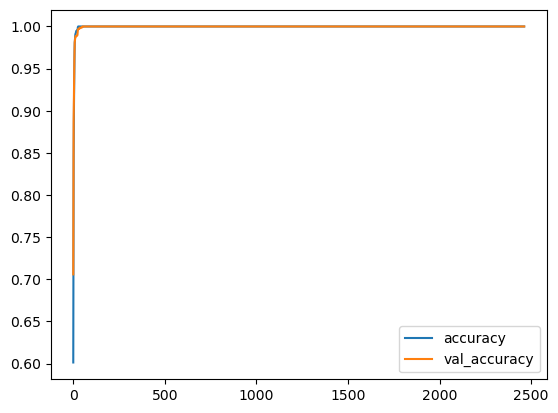

In [18]:
plt.plot(history.history['accuracy'][:-50], label='accuracy')
plt.plot(history.history['val_accuracy'][:-50], label='val_accuracy')
plt.legend()
plt.show()

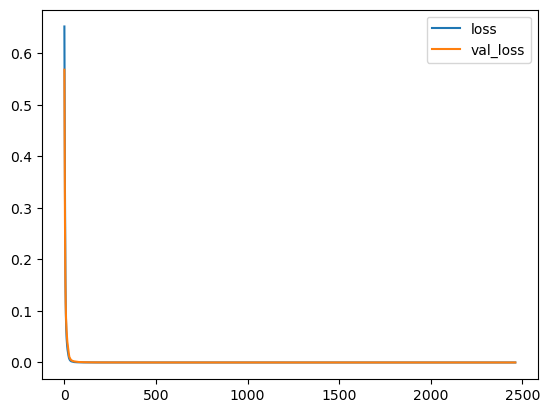

In [19]:
plt.plot(history.history['loss'][:-50], label='loss')
plt.plot(history.history['val_loss'][:-50], label='val_loss')
plt.legend()
plt.show()

In [20]:
# 모델을 복원한다.
best_model = load_model('03_model.h5')
best_model


In [21]:
# 검증 데이터를 가지고 예측을 한다.
pred = best_model.predict(X_test)
pred


63/63 [==============================] - 0s 1ms/step


array([[2.2661006e-10],
       [2.5063965e-15],
       [4.5625958e-21],
       ...,
       [3.8142420e-10],
       [1.5413743e-11],
       [1.0000000e+00]], dtype=float32)

In [22]:
# 결과를 환산하고 평가한다.
y = (pred >= 0.5).astype('int')
y = y.reshape(-1)

r1 = accuracy_score(y_test, y)
r1


1.0

In [24]:
# 저장
with open('train_model2.dat', 'wb') as fp :
    pickle.dump(encoder_dict, fp)
    pickle.dump(scaler1, fp)
    pickle.dump(best_model, fp)


INFO:tensorflow:Assets written to: ram://cc57e9c4-4c52-49ec-b9ac-f6b338988a18/assets


In [25]:
# 저장
with open('train_model2.dat', 'wb') as fp :
    pickle.dump(encoder_dict, fp)
    pickle.dump(scaler1, fp)
